# Exploration of the Titanic Survivor Data Set

The goal of the exercise is to use python, pandas and numpy to explore the titanic data set to discover links between survival and the passengers attributes.

We will explore the following different relationships in the data:

1. Did Age or Gender affect survival?
2. What was the Age distribution?
3. What were the average amounts paid for tickets for different ages?
4. Did the amount paid for passage affect the chances for survival?
5. Is the Amount paid for a fare related to the class?
6. Which ports did the different classes come from?
7. Did class affect the chances of survival? 

In order to answer these questions we will manipulate the data and create visualizations that will aid in our conclusions. 

In [34]:
# Exploration of Titanic Survivor Data Set
# by Alexander Matheson

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [35]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### Data Manipulation and Remarks

##### Completeness
At this point, we can see that there are missing data points for: 
* ages(714 of 891), 
* cabins(204 of unknown) and 
* embarkment ports (889 of 891). 

The cabins will be neglected for this analysis because we can assume that the lower class passengers did not have specified cabins and we will not be going into detail as to the cabin affecting the chance of survival, without a detailed blueprint of the ship. We will have to take into consideration the missing ages during this analysis as it represents incomplete information. For this analysis we will remove the "NaN" Age entries to prevent skewing our data and as an alternative to imputation with the average value. 

##### Type
For the ease of analysis further in this report, we will round the ages of the passengers to the nearest year and put the age in a separate column, marked age_rounded

##### Removal
Since we will not be using the names and the tickets of the individuals, this will be removed from the data set

##### Manipulations
All data manipulations will be marked throughout the report in the code sections.

In [38]:
titanic_df.drop(['Ticket','Name'],axis=1,inplace=True)

In [39]:
titanic_df.dropna(subset = ['Age'],axis=0,inplace=True)
titanic_df['age_rounded'] = titanic_df.round({'Age':0})['Age']

In [40]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
age_rounded    714 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 66.9+ KB


##### Manipulation  - Removed Ticket and Name and missing Age passengers from data set and added rounded ages to a new rounded ages column

1. did the age and sex of a passenger affect whether they survived. The titanic, like most ships in that era had the policy of women and children first (source:https://en.wikipedia.org/wiki/Women_and_children_first). If this were true we would see a discrepancy in the ages and the sex of the passengers. 


minimum age on board of known ages of passengers
0.42
maximum age on board of known ages of passengers
80.0
mean age on board of known ages of passengers
29.6991176471
25% and 75% quantiles on board of known ages of passengers
(20.125, 38.0)
-----------------------------------
counts of children, adults and seniors
Adult     493
Senior    150
Child      71
Name: age_binned, dtype: int64


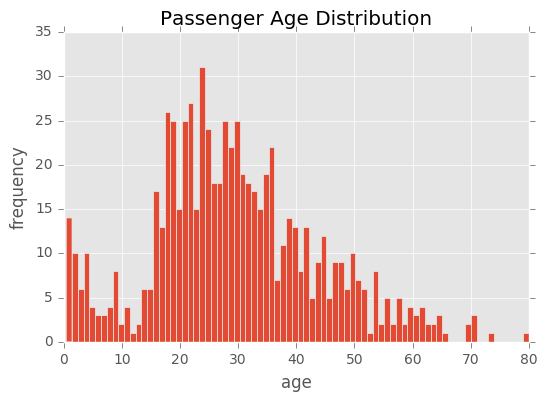

In [41]:
# show age statistics and add column of adjusted ages into bins Child = 0-13, Adult = 14-50, Senior = 51-90
print('minimum age on board of known ages of passengers')
print(titanic_df['Age'].min())
print('maximum age on board of known ages of passengers')
print(titanic_df['Age'].max())
print('mean age on board of known ages of passengers')
print(titanic_df['Age'].mean())
print('25% and 75% quantiles on board of known ages of passengers')
print(titanic_df['Age'].quantile(.25),titanic_df['Age'].quantile(.75))
print('-----------------------------------')
print('counts of children, adults and seniors')
titanic_df['age_binned'] = pd.cut(titanic_df['Age'], bins=[0,13,40,90], labels=['Child','Adult','Senior'])
print(titanic_df['age_binned'].value_counts())
hist = titanic_df['Age'].hist(bins=80)
hist.set(xlabel="age", ylabel="frequency", title ='Passenger Age Distribution')

##### Manipulation: bucketizing of ages using the cut function

Here we can visualize the distribution of ages. It looks that there are a significant number of infants, but the largest proportion of the population is in the range between 16 and 36, which is very similar to the interquartile range calculated above. 

In [42]:
print("Age Survivor Statistics")
print(titanic_df.groupby('Survived')['Age'].mean())
print('\n')
print("Sex Survivor Statistics")
sex_stats = titanic_df.groupby('Survived')['Sex'].value_counts()
print(sex_stats)
def ratio_cal(df,column):
    return float(df[0][column])/(df[0][column] + df[1][column])
print("Female decease ratio = " + str(ratio_cal(sex_stats,'female')))
print("Male decease ratio = " + str(ratio_cal(sex_stats,'male')))

Age Survivor Statistics
Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


Sex Survivor Statistics
Survived  Sex   
0         male      360
          female     64
1         female    197
          male       93
Name: Sex, dtype: int64
Female decease ratio = 0.245210727969
Male decease ratio = 0.794701986755


From the above tabulations of the data, it looks as though the survival group was slightly younger than those that did not, the difference is very small and may not be significant. With regards to the sex of the survivors. The ratio of deceased males was 0.811 while the ratio of deceased females was much lower at 0.258, which suggests that being a female increased your chances of survival. This seems inline with the rule of women and children first, that is supposed to be issued in the case of an emergency, but we cannot assume this was the cause for this discrepancy.  

2. We can look further into the analysis of the ages to see the distirbution of ages in the survival and deceased data. 

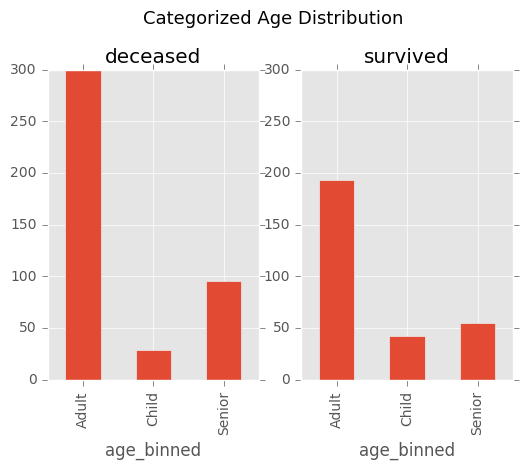

In [43]:
fig, axs = plt.subplots(1,2)
titanic_df.groupby('Survived')['age_binned'].value_counts()[0].sort_index().plot.bar(ax=axs[0],ylim=(0,300),title="deceased")
titanic_df.groupby('Survived')['age_binned'].value_counts()[1].sort_index().plot.bar(ax=axs[1],ylim=(0,300),title="survived")
fig.suptitle('Categorized Age Distribution',y=1.05,fontsize=13)

From this data, we can further see that the age distributions show that the very youngest had higher chances of survival (1-6), but a large proportion of young adults did not survive. This is not definitive and could also correspond with the ticket prices, which we will look at next.

3. (4.) Which tickets would help your chances of survival? In this next portion we will look at the differences in fare paid by passenegers of the deceased and the survivors as well as a distribution of the ticket prices by age.

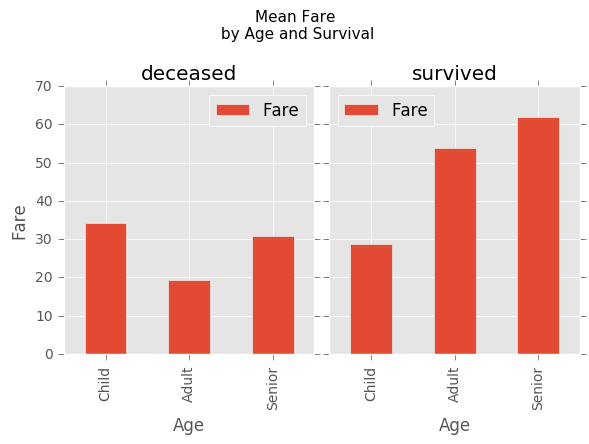

In [44]:
f, ax = plt.subplots(1,2,sharex=True,sharey=True)
for survival in [0,1]:
    df_grouped = titanic_df.loc[titanic_df['Survived']==survival].groupby(['age_binned'],as_index=False).mean()
    df_grouped[['age_binned','Fare']].plot.bar(x='age_binned',y='Fare',stacked=False,ax=ax[survival])
    survival_text = 'survived'
    if survival == 0: 
        survival_text = 'deceased'
        ax[survival].set_ylabel('Fare')
    ax[survival].set_title(survival_text)
    ax[survival].set_xlabel('Age')

f.suptitle('Mean Fare\n by Age and Survival', y=1.1, fontsize=11)
f.tight_layout()
plt.show()

From this plot we can see that there is a difference in the average fare paid by adults and seniors in the group which survived, while the children or infants were not largely affected . 

4. We will investigate this further through relationships between the ticket prices and survival. 

[<matplotlib.text.Text at 0x116c31e90>, <matplotlib.text.Text at 0x1172d81d0>]

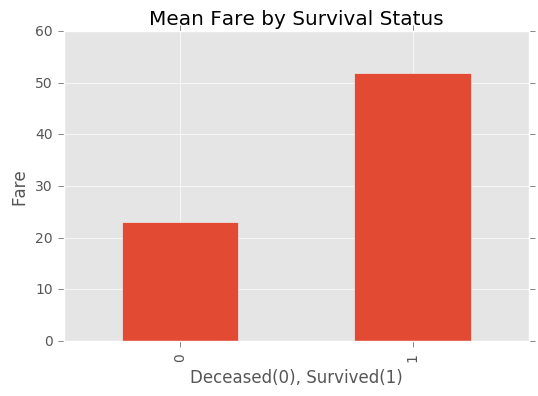

In [45]:
survival_fare = titanic_df.groupby('Survived')['Fare'].mean()
ax = titanic_df.groupby('Survived')['Fare'].mean().plot.bar(title = 'Mean Fare by Survival Status')
ax.set(ylabel='Fare',xlabel='Deceased(0), Survived(1)')

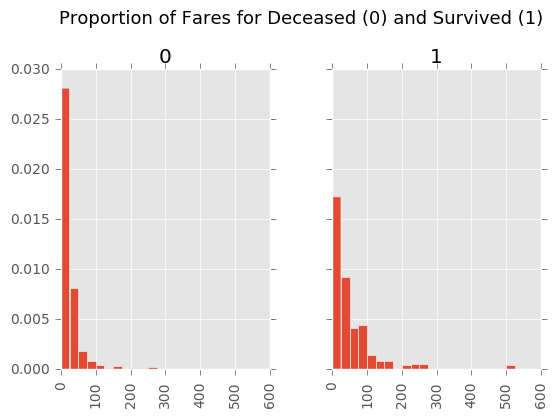

In [46]:
#plot histogram of fares by survival
ax = titanic_df['Fare'].hist(by=titanic_df['Survived'],bins=range(0,600,25),normed=True, sharey=True)
plt.suptitle('Proportion of Fares for Deceased (0) and Survived (1)', y=1.05, fontsize=13)

From the average figure above, we can see that the mean fare of the survivors is larger than the deceased. In addition the distribution shows us that those that paid larger fair had a higher chance of surviving.

5. Next we will look at the class, which is assumed to be related to the fare to determine the likelihood of survival. First we will check to see if the fare is related to the pclass for our population. 

Covariance
-24.5831383828
Pearson Coefficient
-0.55418247086
Pclass
1    87.961582
2    21.471556
3    13.229435
Name: Fare, dtype: float64


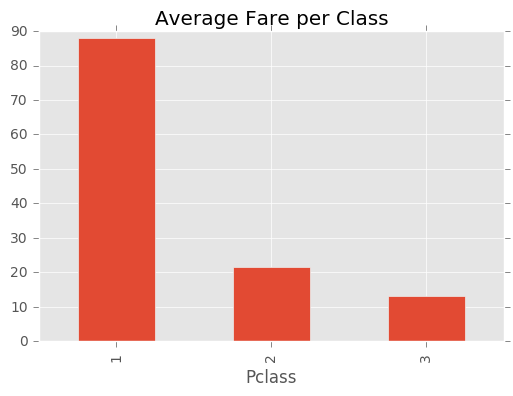

In [47]:
print('Covariance')
print(titanic_df['Fare'].cov(titanic_df['Pclass']))
print('Pearson Coefficient')
print(titanic_df['Fare'].corr(titanic_df['Pclass']))
print(titanic_df.groupby('Pclass')['Fare'].mean())
titanic_df.groupby('Pclass')['Fare'].mean().plot.bar(title = "Average Fare per Class")

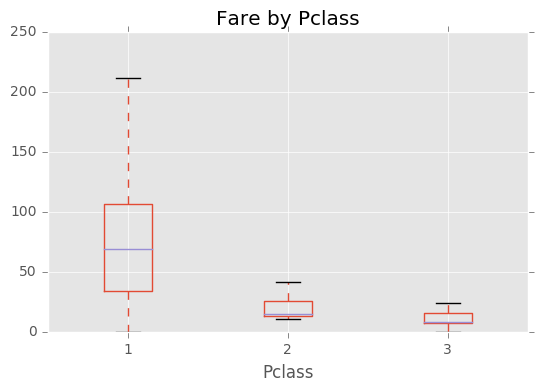

In [48]:
#remove the outliers with showfliers=False from first class - >500
titanic_df.boxplot('Fare',by = 'Pclass', showfliers=False)
plt.title('Fare by Pclass')
plt.suptitle('')

Above, we have 2 visualizations of the ticket fare paid in relationship to the class. The average data clearly shows the separation of the different classes. The boxplot shows the distribution within each class as well as the median, accounting for outliers that skewed the first class data. The differences in the cost may be attributed to passenger age, room type, room size or different ticket options. 

6. What may also be interesting to see is whether the port of embarkment (Cherbourg, Queenstown, Southampton) may be related to the class as well. 

Cherbourg
Pclass
1    0.103933
3    0.057584
2    0.021067
Name: Pclass, dtype: float64

Queenstown
Pclass
3    0.033708
1    0.002809
2    0.002809
Name: Pclass, dtype: float64

Southampton
Pclass
3    0.407303
2    0.219101
1    0.151685
Name: Pclass, dtype: float64


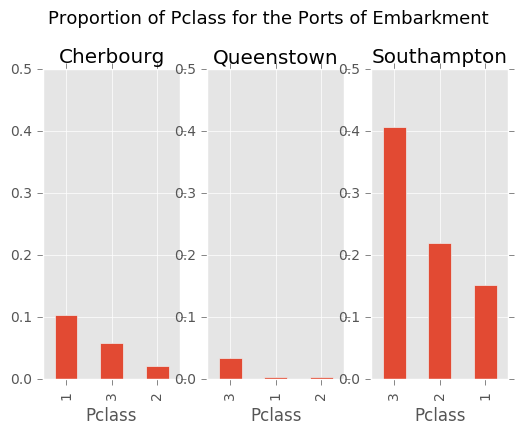

In [49]:
embarked_df = titanic_df.groupby('Embarked')['Pclass'].value_counts()
C = embarked_df['C']/float(embarked_df.sum())
Q = embarked_df['Q']/float(embarked_df.sum())
S = embarked_df['S']/float(embarked_df.sum())
print('Cherbourg')
print(C)
print('\nQueenstown')
print(Q)
print('\nSouthampton')
print(S)
fig, axs = plt.subplots(1,3)
C.plot.bar(ax=axs[0], title = "Cherbourg", ylim = (0,0.5))
Q.plot.bar(ax=axs[1], title = "Queenstown", ylim = (0,0.5))
S.plot.bar(ax=axs[2], title = "Southampton", ylim = (0,0.5))
fig.suptitle('Proportion of Pclass for the Ports of Embarkment',y=1.05,fontsize=13)

From the above graphs we can see that Southhampton had the largest porportion of embarkees in all categories, but Cherbourg had a higher proportion of class 1 passengers than any other class. Cherbourg was the only port in France that the Titanic picked up passengers from. (source: http://cherbourg-titanic.com/en/2011/11/les-francais-embarques-a-cherbourg/). This answers the question of whether the port of embarkment was determined by the class. The port of Cherbourg had a disporportionate number of 1st class passengers and passengers from many different countries. (source: http://cherbourg-titanic.com/en/2011/11/les-francais-embarques-a-cherbourg/). It should be noted that there are additional embarkement data points missing, 889 of 891 are reported.

7. Now we will assess the affect class had on survival.

Survived  Pclass
0         3         270
          2          90
          1          64
1         1         122
          3          85
          2          83
Name: Pclass, dtype: int64


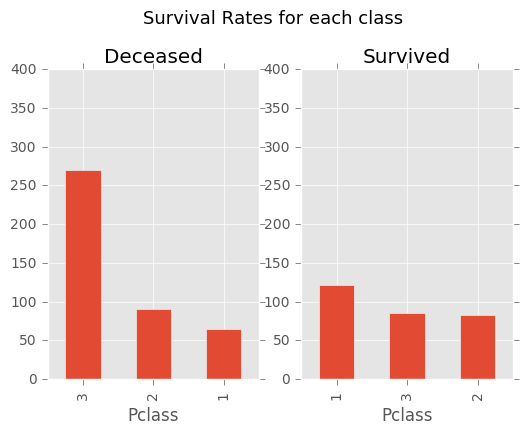

In [50]:
class_survival_rate = titanic_df.groupby('Survived')['Pclass'].value_counts()
print(class_survival_rate)
class_deceased = class_survival_rate[0]
class_survived = class_survival_rate[1]
fig, axs = plt.subplots(1,2)
class_deceased.plot.bar(ax=axs[0],ylim = (0,400),title='Deceased')
class_survived.plot.bar(ax=axs[1],ylim = (0,400),title='Survived')
fig.suptitle('Survival Rates for each class',y=1.05,fontsize=13)

As you can see from this data, being from class 1 or 2 significantly increases your chances of survival. This data is not exactly clear because it has not been normalized, so see below for the same data as a percentage of the total from each class. 

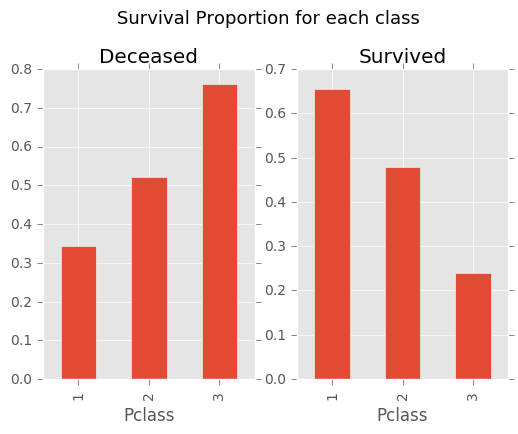

In [51]:
proportion_class_deceased = class_deceased / (class_deceased + class_survived)
proportion_class_survived = class_survived / (class_deceased + class_survived)
fig, axs = plt.subplots(1,2)
proportion_class_deceased.plot.bar(ax=axs[0],title='Deceased')
proportion_class_survived.plot.bar(ax=axs[1],title='Survived')
fig.suptitle('Survival Proportion for each class',y=1.05,fontsize=13)

Here you can more easily see that the chances of survival increase with the class of the person. proportion of the class survival data is on the right and deceased on the left.

In conclusion of our analysis, although it is a tentative analysis that has not used statistical tests to solidify our observations into confident results, we can say that if you paid more for your ticket and were female, you had a higher chance of surviving the Titanic. 

In order to solidify this hypothesis we could complete some tests that reject or accept the following:
1. Gender did not affect chances of survival
2. Age did not affect chances of survival
3. Fare did not affect chances of survival
4. Class did not affect chances of survival. 
